In [2]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [3]:
# Load the data
sleep_df = pd.read_csv("Sleep_Efficiency_Updated.csv")
sleep_df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,06/03/2021 01:00,06/03/2021 07:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,05/12/2021 02:00,05/12/2021 09:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,25/05/2021 21:30,25/05/2021 05:30,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,03/11/2021 02:30,03/11/2021 08:30,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,13/03/2021 01:00,13/03/2021 09:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [4]:
sleep_df = sleep_df.drop(columns=['ID','Bedtime', 'Wakeup time'])

In [ ]:
sleep_df = sleep_df.dropna()

In [12]:
# Bin Age
bins = [0,25,35,45,55,99]
group_names = ["18-25","25-35","35-45","45-55","55+"]
sleep_df["Age Bins"] = pd.cut(sleep_df["Age"],
                                bins,labels = group_names,
                                include_lowest = True)
sleep_df

,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Age Bins
0,65,Female,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,55+
1,69,Male,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,55+
2,40,Female,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,35-45
3,40,Female,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,35-45
4,57,Male,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,55+
...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,61,Female,7.0,0.67,23,23,54,2.0,50.0,5.0,No,0.0,55+
614,30,Female,8.0,0.94,22,63,15,1.0,75.0,0.0,Yes,2.0,25-35
615,48,Male,6.0,0.79,24,60,16,4.0,0.0,0.0,Yes,2.0,45-55
616,32,Female,5.0,0.86,20,65,15,1.0,25.0,1.0,No,0.0,25-35


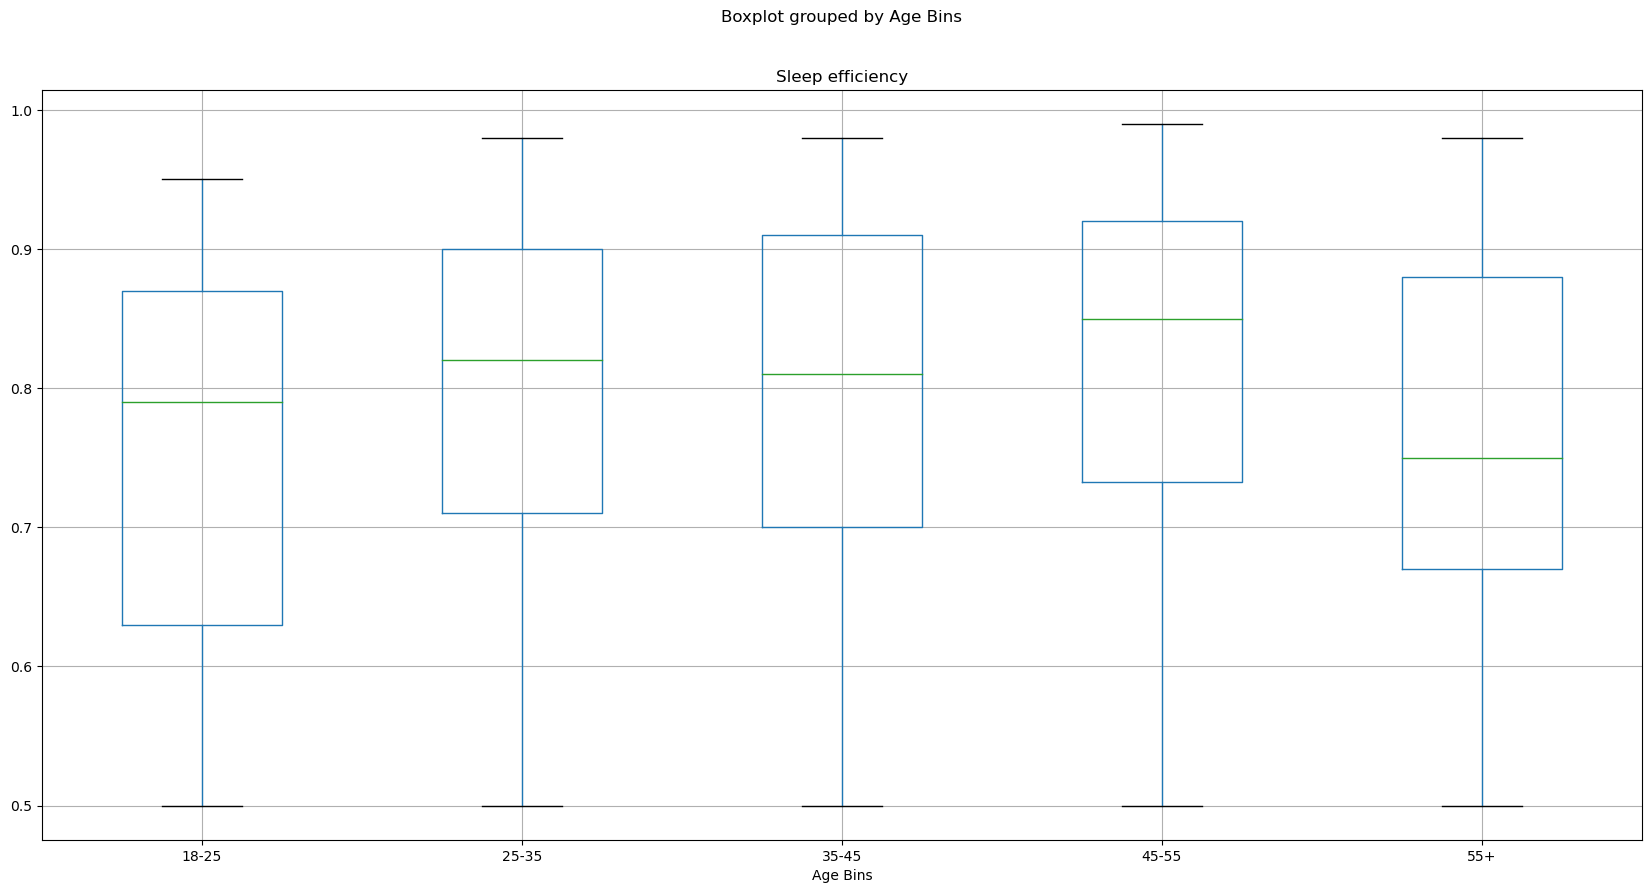

In [15]:
sleep_df.boxplot("Sleep efficiency", by="Age Bins",figsize=(20, 10))
set_title = ('Sleep duration by age')

In [17]:
# If the data is in a dataframe, we use pandas to give quartile calculations
sleep = sleep_df["Sleep efficiency"]
quartiles = sleep.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Monthly Income is: {lowerq}")
print(f"The upper quartile of Monthly Income is: {upperq}")
print(f"The interquartile range of Monthly Income is: {iqr}")
print(f"The median of Monthly Income is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Monthly Income is: 0.7024999999999999
The upper quartile of Monthly Income is: 0.9
The interquartile range of Monthly Income is: 0.19750000000000012
The median of Monthly Income is: 0.82 
Values below 0.4062499999999997 could be outliers.
Values above 1.1962500000000003 could be outliers.


The correlation between age and Sleep efficiency is 0.1


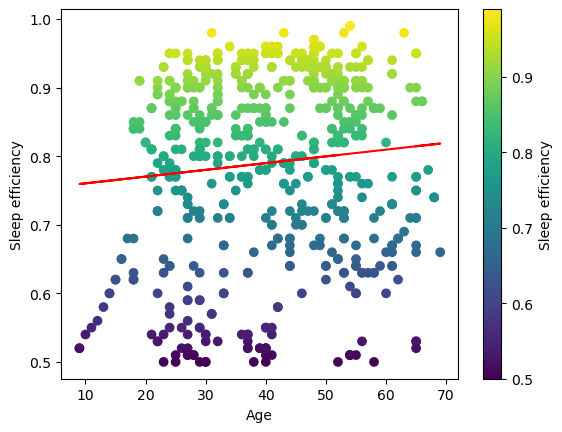

In [22]:
correlation = st.pearsonr(sleep_df["Age"],sleep_df["Sleep efficiency"])
print(f"The correlation between age and Sleep efficiency is {round(correlation[0],2)}")

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(sleep_df["Age"], sleep_df["Sleep efficiency"])
regress_values = sleep_df["Age"] * slope + intercept

plt.scatter(sleep_df['Age'], sleep_df['Sleep efficiency'], c=sleep) 
clb = plt.colorbar() 
plt.plot(sleep_df["Age"],regress_values,"r-")
plt.xlabel("Age") 
plt.ylabel("Sleep efficiency") 
clb.set_label("Sleep efficiency") 
plt.show()